In [3]:
import pandas as pd

In [4]:
import numpy as np

# Условие 1

> Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [5]:
df = pd.read_csv('kc_house_data.csv', encoding='latin-1', sep=',')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

Анализ датасета с помощью Pandas (Описание датасета)

- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - кв. метры жилые
- sqft_lot - кв. метры общие
- floors - кол-во этажей
- waterfront - признак наличия набережной
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

> 1.2. Изучите стоимости недвижимости

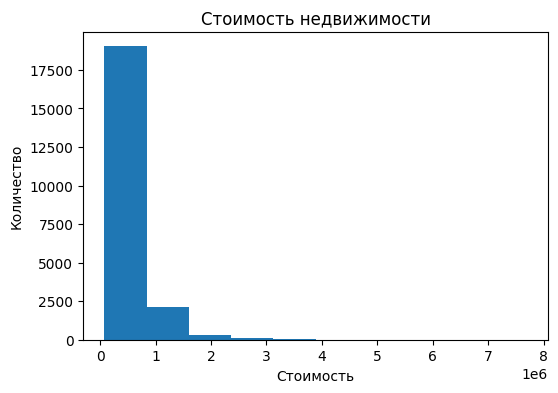

In [9]:
plt.figure(figsize = (6,4))
plt.hist(df['price'], bins = 10)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

Вывод:

1. Колличество домов прямопропорционально их цене
2. Максимальное количество недвижимости продается по цене до ~700 000-1 000 000 д.е., основная часть недвижимости продается по цене до 2 000 000 д.е.


> 1.3. Изучите распределение квадратуры жилой

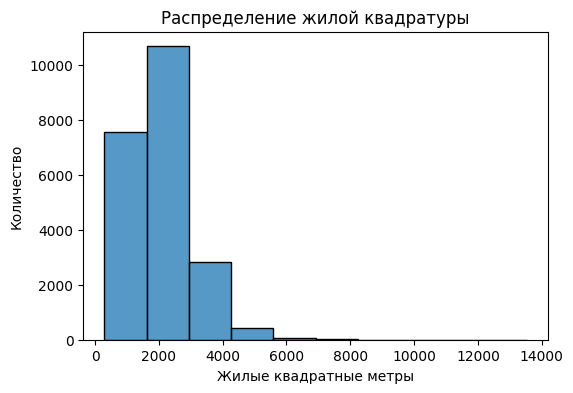

In [10]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 10)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

Вывод:

Максимальное количество недвижимости продается с жилой площадью от ~1700 до 2300 кв.м., основная часть недвижимости продается с жилой площадью от ~500 до 6000 кв.м.

> 1.4 Изучите распределение года постройки

In [13]:
data_yr = df['yr_built'].value_counts(ascending=True)
data_yr.head()

yr_built
1934    21
1935    24
1902    27
1901    29
1933    30
Name: count, dtype: int64

In [11]:
years_list = [1900+i*10 for i in range (0,13)]

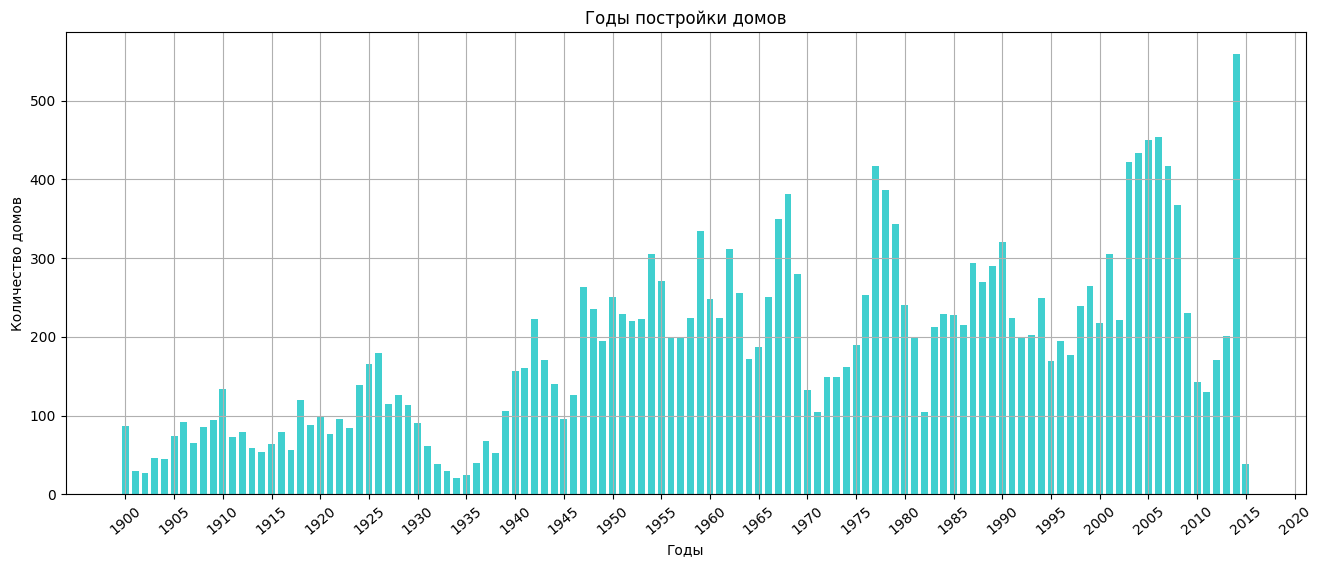

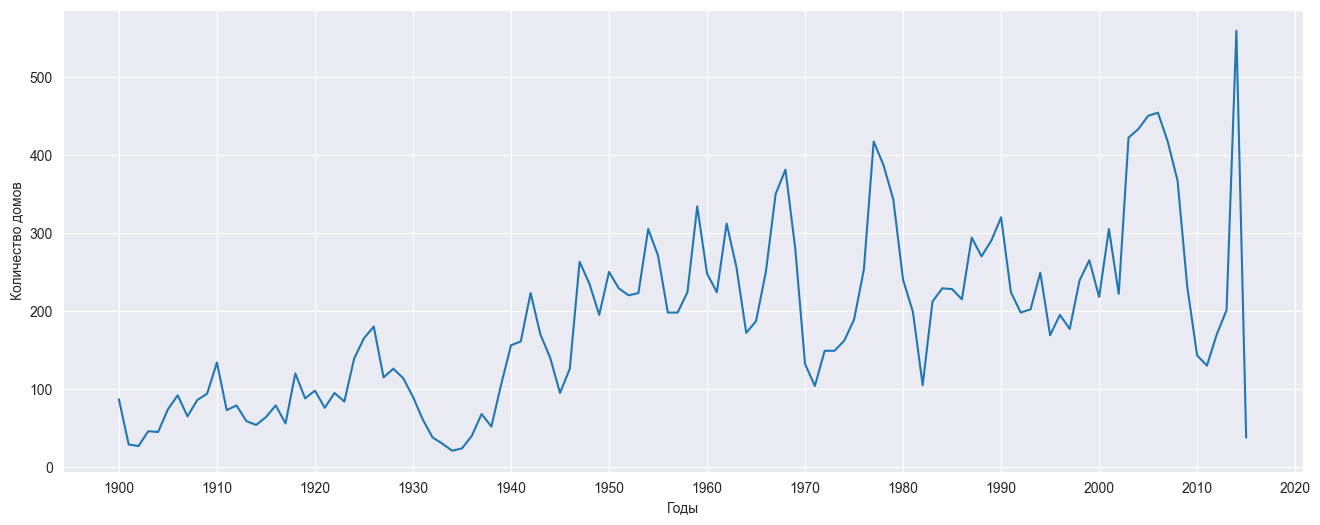

In [14]:
names = data_yr.index
values = data_yr.values
yr_list = list(range(1900,2025,5))
plt.figure(figsize=(16, 6))
plt.bar(names,values, width=0.7, facecolor='c', alpha=0.75)
plt.title('Годы постройки домов')
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.grid(True)
plt.xticks(yr_list,rotation=40);
plt.show()
   
plt.figure(figsize=(16,6))
sns.set_style("darkgrid")
sns.lineplot(data=data_yr, x=names,y=values)
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.xticks(ticks=years_list);

Вывод:

Кризисы строительтва были в середине 30-х начале 70-х, пики в конце 60-х 70-х и середине нулевых. Наибольшее количество домов построено с 2012 по 2015 гг.

# Условие 2

> 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

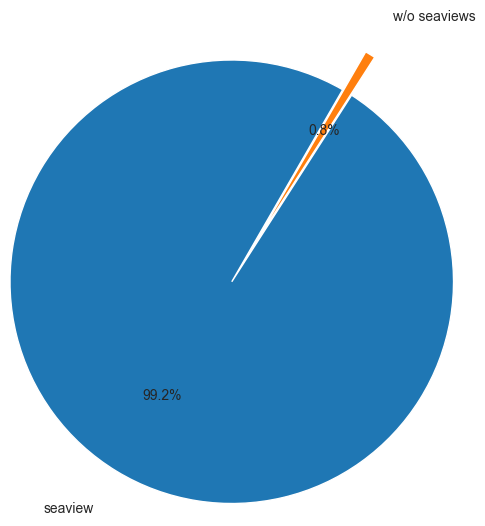

In [15]:
data_view = df['waterfront'].value_counts()
val = data_view.values
plt.pie(val,labels=['seaview', 'w/o seaviews'],explode=[0,0.3],
        radius = 1.5, startangle=60,
        labeldistance=1.2, autopct='%.1f%%');

Вывод:

Всего лишь 0,8% всей недвижимости продается с видом на набережную

> 2.2 Изучите распределение этажей домов

In [16]:
df.floors.max(), df.floors.min()

(3.5, 1.0)

In [17]:
data2 = df['floors'].value_counts(normalize=True)*100
data2

floors
1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: proportion, dtype: float64

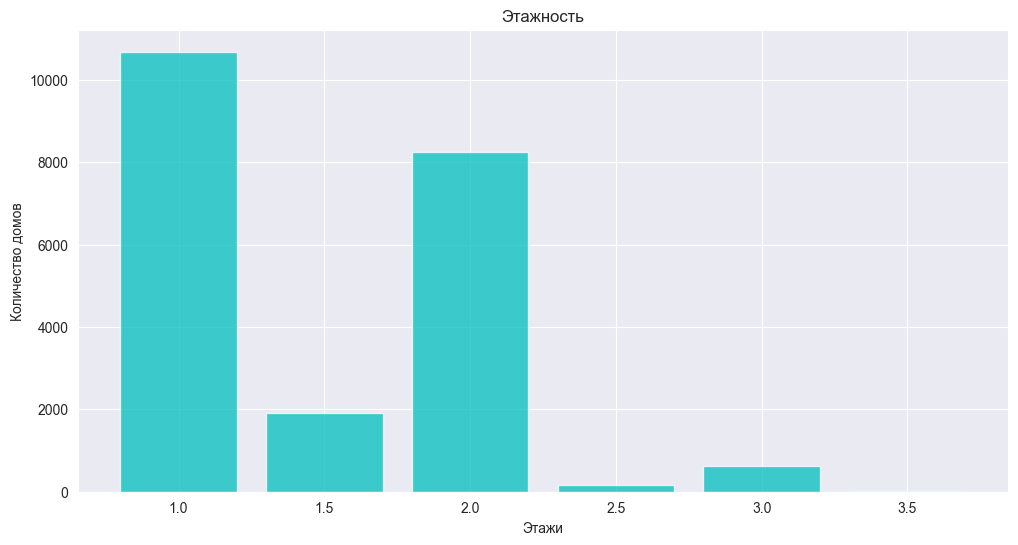

In [18]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.4, facecolor='c', alpha=0.75)
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(True)
plt.show()

Вывод:

1. Большая часть домов состоит из 1 и 2 этажей.
2. Одноэтажные дома лидируют по продаже недвижимости в 49,4%.
3. Минимальная доля продажи приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04%)

> 2.3 Изучите распределение состояния домов

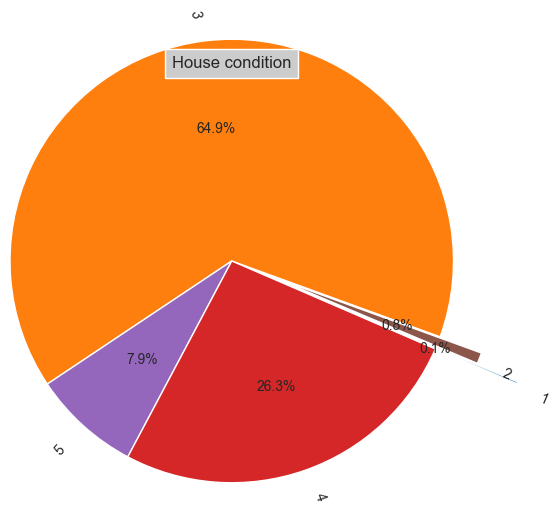

In [19]:
data_cond = df['condition'].value_counts(sort=False)
data_cond
cond_val= data_cond.values
cond_ind = data_cond.index
cond_explode = [0,0,0,0.6,0.3]
colors = ["#ff7f0e", "#9467bd", "#d62728","#1f77b4", "#8c564b"]
plt.title("House condition")
plt.pie(cond_val, labels=cond_ind, radius = 1.5,
        startangle=-20, colors=colors,
        rotatelabels=True, explode = cond_explode,
        labeldistance=1.1, autopct='%.1f%%')
plt.title("House condition", bbox={'facecolor':'0.8', 'pad':5})
plt.show;

Вывод:

Менее 1% домов в плохом состоянии, около 2/3 домов в среднем (3) состоянии

# Условие 3

> Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

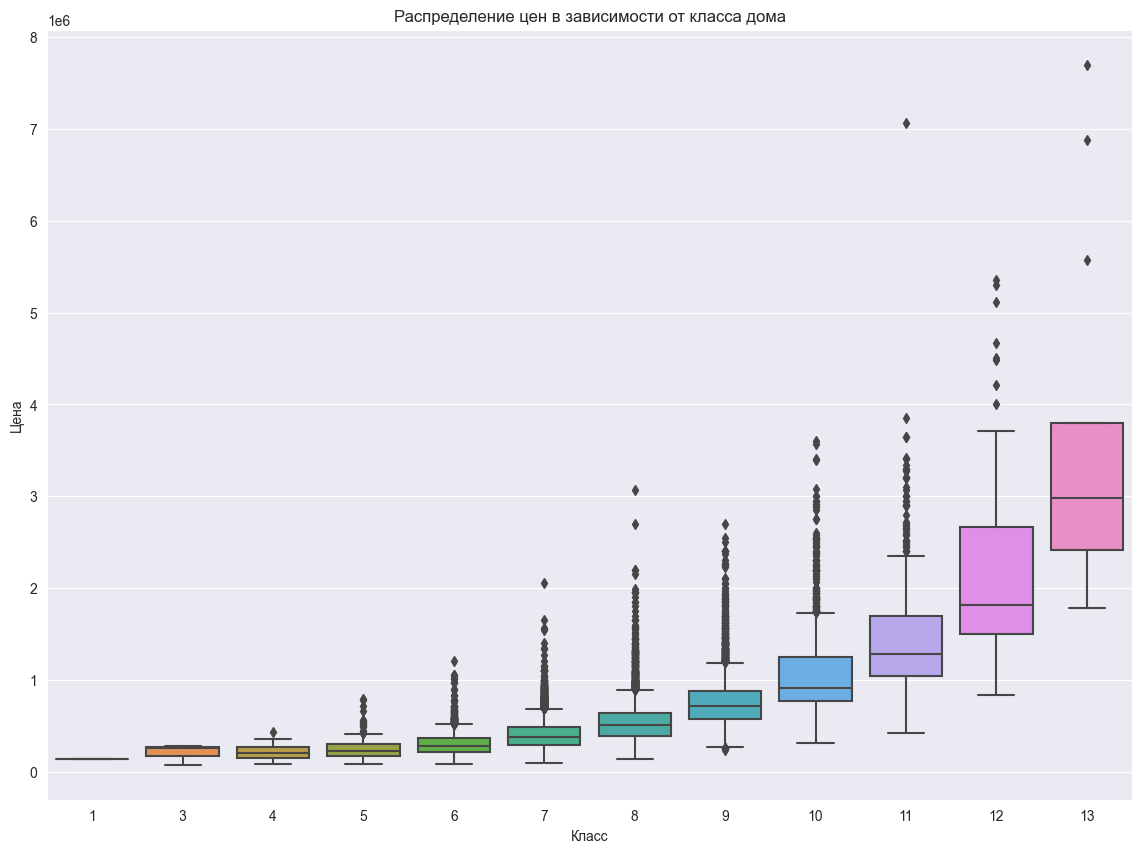

In [20]:
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.0)

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

Вывод:

- с увеличением уровня класса (grade - качество конструкции и дизайна дома) растет и расброс по цене;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.

In [22]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


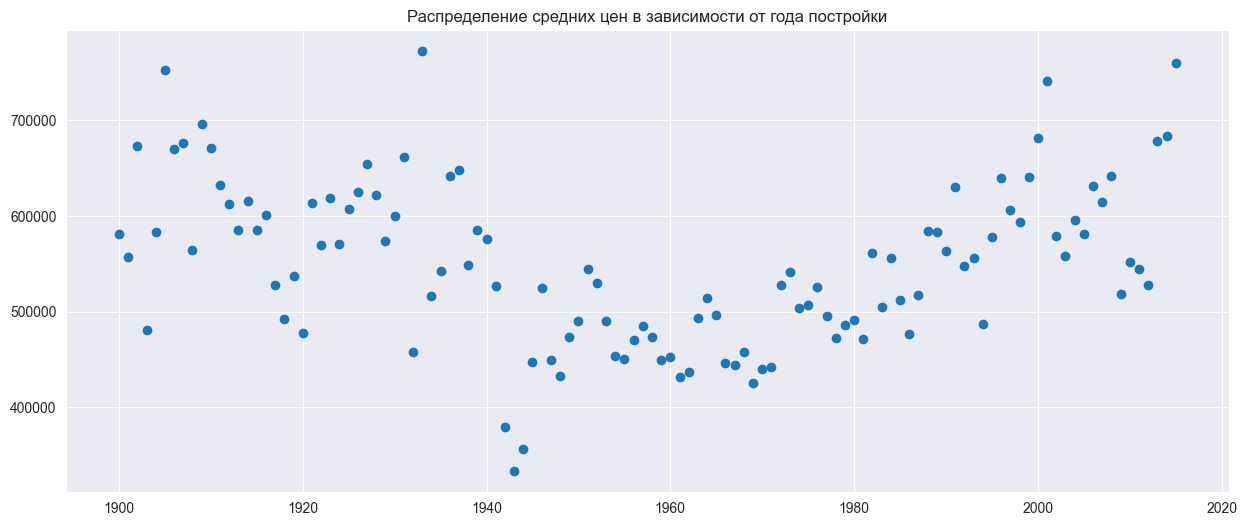

In [23]:
plt.figure(figsize=(15, 6))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

Вывод:

- распределение цены в зависимости от года постройки имеет U-образную форму;
- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась;
- при этом цена на дома, построенные в1940-х годах, принимает неожиданно низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начала расти;
- для домов, построенных в 2020-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах;
- могу предположить, что старые дома, которые стоят больше 1 века, имеют особую историческую значимость и поэтому их цена находится на одном уровне с ценами домов, построенных в 2000-х годах.